In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load and Clean Data

In [2]:
# Read data
df1 = pd.read_excel('https://github.com/tmcamero/Pediatric_Cancer_Survival/blob/main/Scripts/youth_cancer.xlsx?raw=true')


# Clean data

# Year Variable
# Rename Year of Diagnosis column
df1.rename(columns = {'Year of diagnosis' : 'Year_Diagnosed'}, inplace = True)

# Site Variable
# Rename site column
df1.rename(columns = {'Site recode ICD-O-3/WHO 2008' : 'Site'}, inplace = True)

# Survival Months Variable
# Rename survival months column
df1.rename(columns = {'Survival months' : 'Survival_Months'}, inplace = True)

# COD Variable
# Rename column
df1.rename(columns = {'SEER cause-specific death classification' : 'Cause_of_Death'}, inplace = True)
# Rename COD variables
clean_cod_def = {"Cause_of_Death":
            {"Alive or dead of other cause": 'Survived', 
            "Dead (attributable to this cancer dx)": 'Deceased',
            "Dead (missing/unknown COD)": 'Unknown'}}
df1 = df1.replace(clean_cod_def)

# Age Varialbe
# Extract number from age variable
df1['Age'] = df1['Age recode with single ages and 85+'].str.extract('(\d+)').astype(int)
# Change type to int
df1['Age'] = df1['Age'].astype('int')

# Race_origin variable
# Rename column
df1.rename(columns = {'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)' : 'Race_Origin_Recode'}, inplace = True)

# Median Income Variable
# Rename Column
df1.rename(columns = {'Median household income inflation adj to 2019' : 'Med_House_Inc'}, inplace = True)

# Rural-Urban Code
# Rename Column
df1.rename(columns = {'Rural-Urban Continuum Code' : 'Rural_Urban_Code'}, inplace = True)

# Record size of data
print(df1.shape)


(69263, 22)


## Examine Data

In [3]:
# Examine data types
print(df1.dtypes)

Patient ID                                   int64
Age recode with <1 year olds                object
Age recode with single ages and 85+         object
Sex                                         object
Year_Diagnosed                               int64
Race recode (W, B, AI, API)                 object
Origin recode NHIA (Hispanic, Non-Hisp)     object
Race_Origin_Recode                          object
Site                                        object
Behavior code ICD-O-3                       object
Primary Site - labeled                      object
Primary Site                                 int64
Histologic Type ICD-O-3                      int64
Diagnostic Confirmation                     object
Med_House_Inc                               object
Rural_Urban_Code                            object
COD to site recode                          object
Cause_of_Death                              object
SEER other cause of death classification    object
Survival_Months                

In [4]:
# Print first 5 rows
df1.head()

,Patient ID,Age recode with <1 year olds,Age recode with single ages and 85+,Sex,Year_Diagnosed,"Race recode (W, B, AI, API)","Origin recode NHIA (Hispanic, Non-Hisp)",Race_Origin_Recode,Site,Behavior code ICD-O-3,...,Histologic Type ICD-O-3,Diagnostic Confirmation,Med_House_Inc,Rural_Urban_Code,COD to site recode,Cause_of_Death,SEER other cause of death classification,Survival_Months,Vital status recode (study cutoff used),Age
0,3731,01-04 years,02 years,Female,2001,White,Non-Spanish-Hispanic-Latino,Non-Hispanic White,Brain,Malignant,...,9450,Positive histology,"$75,000+",Counties in metropolitan areas ge 1 million pop,Alive,Survived,Alive or dead due to cancer,206,Alive,2
1,8356,10-14 years,10 years,Female,2001,Asian or Pacific Islander,Non-Spanish-Hispanic-Latino,Non-Hispanic Asian or Pacific Islander,"Nose, Nasal Cavity and Middle Ear",Malignant,...,8900,Positive histology,"$75,000+",Counties in metropolitan areas ge 1 million pop,Soft Tissue including Heart,Deceased,Alive or dead due to cancer,29,Dead,10
2,8498,10-14 years,13 years,Male,2001,Asian or Pacific Islander,Non-Spanish-Hispanic-Latino,Non-Hispanic Asian or Pacific Islander,Other Endocrine including Thymus,Malignant,...,9064,Positive histology,"$75,000+",Counties in metropolitan areas ge 1 million pop,Alive,Survived,Alive or dead due to cancer,206,Alive,13
3,8832,05-09 years,07 years,Male,2001,White,Non-Spanish-Hispanic-Latino,Non-Hispanic White,Hodgkin - Nodal,Malignant,...,9663,Positive histology,"$75,000+",Counties in metropolitan areas ge 1 million pop,Alive,Survived,Alive or dead due to cancer,213,Alive,7
4,11340,15-19 years,17 years,Female,2000,White,Non-Spanish-Hispanic-Latino,Non-Hispanic White,Hodgkin - Nodal,Malignant,...,9663,Positive histology,"$75,000+",Counties in metropolitan areas ge 1 million pop,Hodgkin Lymphoma,Deceased,Alive or dead due to cancer,22,Dead,17


In [5]:
# color for graphs
pal = ["#79cfb8", "#6666ff"]

## Examine Survival by Year

In [6]:
# Remove Unknown Cause of Death
clean_cod = pd.DataFrame(df1.loc[df1['Cause_of_Death'] != 'Unknown'])
# Record size of data
clean_cod.shape

(68904, 22)

In [7]:
# Create crosstab showing the year and number of patients by survival
cod_tab = pd.crosstab(clean_cod['Year_Diagnosed'], columns = clean_cod['Cause_of_Death'])
cod_tab

Cause_of_Death,Deceased,Survived
Year_Diagnosed,,
2000,712,2486
2001,764,2724
2002,773,2686
2003,651,2599
2004,665,2805
2005,716,2847
2006,607,2752
2007,653,2960
2008,624,3017


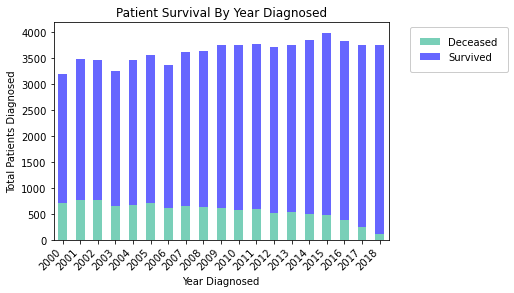

In [8]:
# Create stacked bar graph of cancer survival by year
cod_tab.plot(kind = 'bar', stacked = True, rot = 0, color = pal)
plt.ylabel('Total Patients Diagnosed')
plt.title('Patient Survival By Year Diagnosed')
plt.xlabel('Year Diagnosed')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(bbox_to_anchor = (1.05,1.0), loc = 'upper left', fancybox = True, framealpha = 1, 
           borderpad = 1)
# Save graph
plt.savefig('/Users/teresacameron/Documents/data/survival_by_year_graph.png')
plt.show()


In [9]:
# Create crosstab showing the year and number of patients by survival percentages
cod_tab2 = pd.crosstab(clean_cod['Year_Diagnosed'], columns = clean_cod['Cause_of_Death'], normalize = 'index')
cod_tab2 = cod_tab2.rename_axis(None, axis = 1)
cod_tab2 = cod_tab2.rename_axis(None)
cod_tab2.style.format('{:.2%}')

,Deceased,Survived
2000,22.26%,77.74%
2001,21.90%,78.10%
2002,22.35%,77.65%
2003,20.03%,79.97%
2004,19.16%,80.84%
2005,20.10%,79.90%
2006,18.07%,81.93%
2007,18.07%,81.93%
2008,17.14%,82.86%
2009,16.33%,83.67%


This boxplot shows the number of patients who were diagnosed with cancer and their survival. I believe it is important to see if progress has been made to increasing the chance of survival for children diagnosed with cancer. This will show if treatment or diagnosis has improved over the years.

## Examine Survival by Cancer Type

In [10]:
# Create crosstab of the type of cancer and patient survival
ctype_table = pd.crosstab(clean_cod['Site'], columns = clean_cod['Cause_of_Death'], margins = True)
ctype_table = ctype_table.sort_values(by = 'All', ascending = False )
ctype_table = ctype_table.head(11)
ctype_table = ctype_table.iloc[1:,:-1]
ctype_table = ctype_table.rename_axis(None, axis = 1)
ctype_table = ctype_table.rename_axis(None)
ctype_table

,Deceased,Survived
Acute Lymphocytic Leukemia,1556,13406
Brain,3051,8205
Soft Tissue including Heart,945,3331
Hodgkin - Nodal,131,3544
Bones and Joints,987,2613
Acute Myeloid Leukemia,942,2050
Kidney and Renal Pelvis,250,2671
NHL - Nodal,336,2573
Other Endocrine including Thymus,600,1852
Thyroid,14,2364


In [11]:
# Create table showing the survival percentage by cancer type
ctype_table_norm = pd.crosstab(clean_cod['Site'], columns = clean_cod['Cause_of_Death'], normalize = 'index')
ctype_table_norm = ctype_table_norm.sort_values(by = 'Deceased', ascending = False )
ctype_table_norm = ctype_table_norm.rename_axis(None, axis = 1)
ctype_table_norm = ctype_table_norm.rename_axis(None)
ctype_table_norm.style.format('{:.2%}')

,Deceased,Survived
Esophagus,100.00%,0.00%
Hepatic Flexure,83.33%,16.67%
Rectosigmoid Junction,62.50%,37.50%
"Large Intestine, NOS",60.00%,40.00%
Intrahepatic Bile Duct,57.14%,42.86%
Ureter,50.00%,50.00%
Other Biliary,46.67%,53.33%
Transverse Colon,46.15%,53.85%
Other Oral Cavity and Pharynx,41.67%,58.33%
Oropharynx,40.00%,60.00%


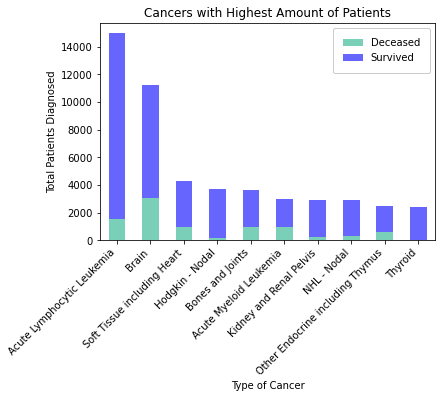

In [12]:
# Create bar graph showing survival by cancer type
ctype_table.plot(kind = 'bar', stacked = True, rot = 0, color = pal)
plt.ylabel('Total Patients Diagnosed')
plt.title('Cancers with Highest Amount of Patients')
plt.xlabel('Type of Cancer')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(fancybox = True, framealpha = 1, borderpad = 1)
# Save graph
plt.savefig('/Users/teresacameron/Documents/data/highest_cancer_type_graph.png')
plt.show()

In [13]:
# Create table showing the survival percentage by cancer type
ctype_table_norm = pd.crosstab(clean_cod['Site'], columns = clean_cod['Cause_of_Death'], normalize = 'index')
ctype_table_norm = ctype_table_norm.sort_values(by = 'Deceased', ascending = False )
ctype_table_norm = ctype_table_norm.rename_axis(None, axis = 1)
ctype_table_norm = ctype_table_norm.rename_axis(None)
ctype_table_norm.style.format('{:.2%}')

,Deceased,Survived
Esophagus,100.00%,0.00%
Hepatic Flexure,83.33%,16.67%
Rectosigmoid Junction,62.50%,37.50%
"Large Intestine, NOS",60.00%,40.00%
Intrahepatic Bile Duct,57.14%,42.86%
Ureter,50.00%,50.00%
Other Biliary,46.67%,53.33%
Transverse Colon,46.15%,53.85%
Other Oral Cavity and Pharynx,41.67%,58.33%
Oropharynx,40.00%,60.00%


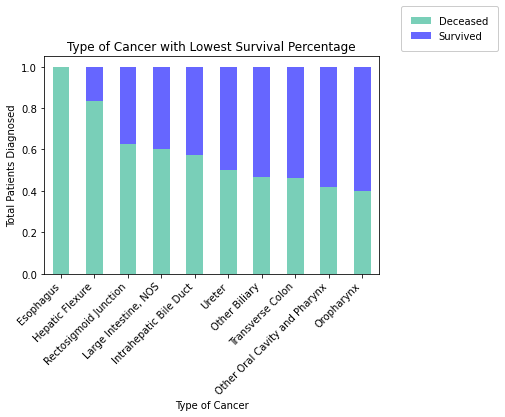

In [14]:
# Create bar graph showing survival percentages
ctype_table_norm2 = ctype_table_norm.head(10)
ctype_table_norm2.plot(kind = 'bar', stacked = True, rot = 0 , color = pal)
plt.ylabel('Total Patients Diagnosed')
plt.title('Type of Cancer with Lowest Survival Percentage')
plt.xlabel('Type of Cancer')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(bbox_to_anchor = (1.05,1.0), loc = 'lower left', fancybox = True, framealpha = 1, 
           borderpad =1)
plt.show()

In [15]:
# Create table showing the survival percentage by cancer type
ctype_table_norm = pd.crosstab(clean_cod['Site'], columns = clean_cod['Cause_of_Death'], normalize = 'index')
ctype_table_norm = ctype_table_norm.sort_values(by = 'Survived', ascending = False )
ctype_table_norm = ctype_table_norm.rename_axis(None, axis = 1)
ctype_table_norm = ctype_table_norm.rename_axis(None)
ctype_table_norm.style.format('{:.2%}')

,Deceased,Survived
Other Urinary Organs,0.00%,100.00%
"Anus, Anal Canal and Anorectum",0.00%,100.00%
Gallbladder,0.00%,100.00%
Mesothelioma,0.00%,100.00%
Hypopharynx,0.00%,100.00%
Appendix,0.43%,99.57%
Thyroid,0.59%,99.41%
Other Non-Epithelial Skin,1.43%,98.57%
Other Female Genital Organs,2.86%,97.14%
Eye and Orbit,2.97%,97.03%


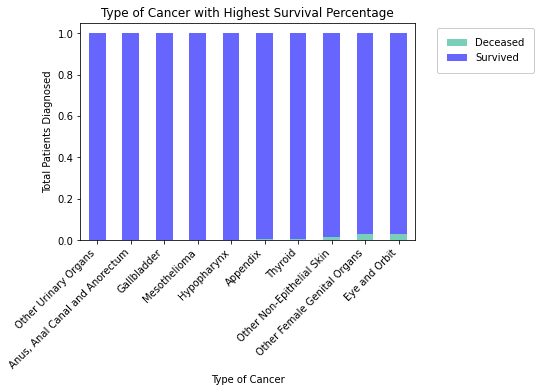

In [16]:
# Create bar graph showing survival percentages
ctype_table_norm3 = ctype_table_norm.head(10)
ctype_table_norm3.plot(kind = 'bar', stacked = True, rot = 0, color = pal)
plt.ylabel('Total Patients Diagnosed')
plt.title('Type of Cancer with Highest Survival Percentage')
plt.xlabel('Type of Cancer')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(bbox_to_anchor = (1.05,1.0), loc = 'upper left', fancybox = True, framealpha = 1, 
           borderpad =1)
plt.show()

In [17]:
# Replace text with numbers for cause of death
clean_cod_def = {"Cause_of_Death":
            {"Survived": 0, 
            "Deceased": 1, 
            "Unknown": 2}}
clean_cod2 = df1.replace(clean_cod_def)

In [18]:
# Create data frame with only cancer related cause of death
cod_cancer = pd.DataFrame(clean_cod2.loc[clean_cod2['Cause_of_Death'] == 1])
cod_cancer.Cause_of_Death.value_counts()

1    10684
Name: Cause_of_Death, dtype: int64

In [19]:
# Change value of cod_cancer column
cod_cancer2 = cod_cancer.replace({'Deceased' : 1})
# Change to int type
#cod_cancer2['Cause_of_Death'] = cod_cancer2['Cause_of_Death'].astype('int')
cod_cancer2.Cause_of_Death.dtype

dtype('int64')

In [20]:
# Create pivot table to show which cancer caused most cancer related deaths 
cancer_type = pd.pivot_table(cod_cancer, index = 'Site', 
                            values = 'Cause_of_Death', aggfunc=np.sum,
                            fill_value = 0)
cancer_type = cancer_type.sort_values(by = 'Cause_of_Death', ascending = False )
cancer_type = cancer_type.reset_index()
cancer_type = cancer_type.head(10)

In [21]:
cancer_type.Site

0                               Brain
1          Acute Lymphocytic Leukemia
2                    Bones and Joints
3         Soft Tissue including Heart
4              Acute Myeloid Leukemia
5    Other Endocrine including Thymus
6                         NHL - Nodal
7                               Liver
8             Kidney and Renal Pelvis
9                       Miscellaneous
Name: Site, dtype: object

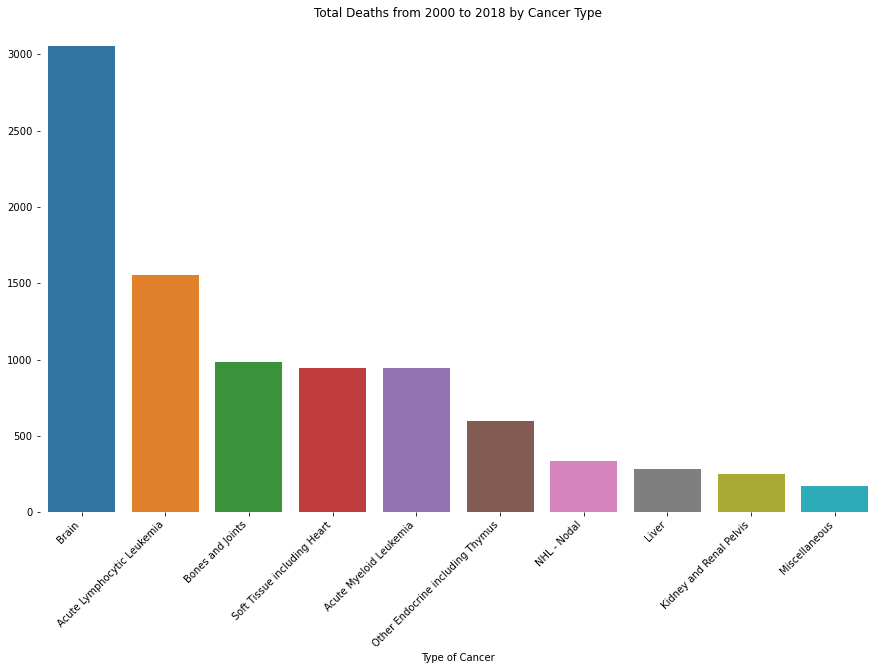

In [22]:
# Create bar graph showing total patients deceased by cancer type
plt.figure(figsize = (15, 9))
sns.barplot(x = 'Site', y = 'Cause_of_Death', data = cancer_type)
plt.ylabel(None)
plt.title('Total Deaths from 2000 to 2018 by Cancer Type')
plt.xlabel('Type of Cancer')
plt.xticks(rotation = 45, ha = 'right') # rotate x labels and move to right
plt.box(False)
plt.show()

These bar graphs show which types of cancers are most common and which have the highest and lowest percentage of survival. This information is important so researchers can determine which types of cancer need more research towards saving children.

## Examine patient age

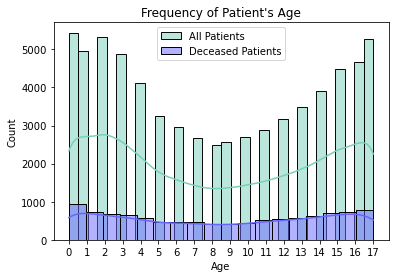

In [23]:
# Histogram of age of all patients and deceased patients
sns.histplot(data = df1, x = 'Age', color = '#79cfb8', label = 'All Patients', kde = True)
sns.histplot(data = cod_cancer, x = 'Age', color = '#6666ff', label = 'Deceased Patients', kde = True)
plt.xticks(range(0,18))
plt.title("Frequency of Patient's Age")
plt.legend()
plt.show()

This graph shows the distribution of the patients age and survival. It is important to see if there is a relationship between age and survival. 

## Examine survival months of patients

In [24]:
print(cod_cancer.shape)
cod_cancer_dropped = cod_cancer[cod_cancer.Survival_Months != 'Unknown'] 
print(cod_cancer_dropped.shape)
cod_cancer_dropped = cod_cancer_dropped[cod_cancer_dropped.Survival_Months != 0] 
print(cod_cancer_dropped.shape)
cod_cancer_dropped['Survival_Months'] = cod_cancer_dropped['Survival_Months'].astype('int')

(10684, 22)
(10581, 22)
(9819, 22)


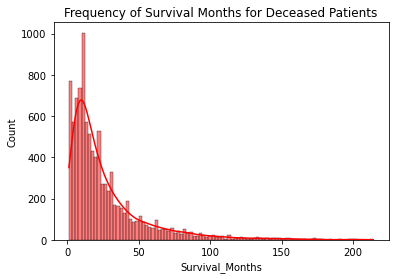

In [25]:
# Histogram of survival months
sns.histplot(data = cod_cancer_dropped, x = 'Survival_Months', label = 'Survival Months', kde = True, color = 'red')
plt.title("Frequency of Survival Months for Deceased Patients")
plt.show()

The above histogram shows the most frequent number of months of survival is around 12 or one year after diagnosis. 

In [4]:
# Read data with only most common cancers and unknown COD removed
df2 = pd.read_excel('https://github.com/tmcamero/Pediatric_Cancer_Survival/blob/main/Scripts/top_cancers.xlsx?raw=true')


# Clean data

# Year Variable
# Rename Year of Diagnosis column
df2.rename(columns = {'Year of diagnosis' : 'Year_Diagnosed'}, inplace = True)

# Site Variable
# Rename site column
df2.rename(columns = {'Site recode ICD-O-3/WHO 2008' : 'Site'}, inplace = True)

# Survival Months Variable
# Rename survival months column
df2.rename(columns = {'Survival months' : 'Survival_Months'}, inplace = True)

# COD Variable
# Rename column
df2.rename(columns = {'SEER cause-specific death classification' : 'Cause_of_Death'}, inplace = True)
# Rename COD variables
clean_cod_def = {"Cause_of_Death":
            {"Alive or dead of other cause": 'Survived', 
            "Dead (attributable to this cancer dx)": 'Deceased',
            "Dead (missing/unknown COD)": 'Unknown'}}
df2 = df2.replace(clean_cod_def)

# Age Varialbe
# Extract number from age variable
df2['Age'] = df2['Age recode with single ages and 85+'].str.extract('(\d+)').astype(int)
# Change type to int
df2['Age'] = df2['Age'].astype('int')

# Race_origin variable
# Rename column
df2.rename(columns = {'Race and origin recode (NHW, NHB, NHAIAN, NHAPI, Hispanic)' : 'Race_Origin_Recode'}, inplace = True)

# Median Income Variable
# Rename Column
df2.rename(columns = {'Median household income inflation adj to 2019' : 'Med_House_Inc'}, inplace = True)

# Rural-Urban Code
# Rename Column
df2.rename(columns = {'Rural-Urban Continuum Code' : 'Rural_Urban_Code'}, inplace = True)

# Record size of data
print(df2.shape)



(38083, 22)


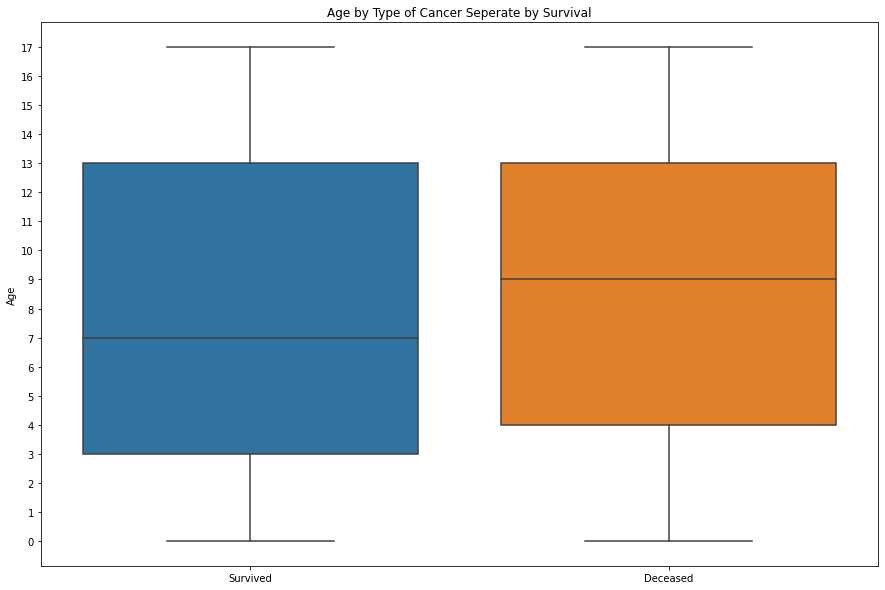

In [27]:
plt.figure(figsize = (15,10))
ax = sns.boxplot(x='Cause_of_Death', y = 'Age', data = df2)
plt.title("Age by Type of Cancer Seperate by Survival")
plt.yticks(range(0,18))
ax.set(xlabel = None)
plt.show()

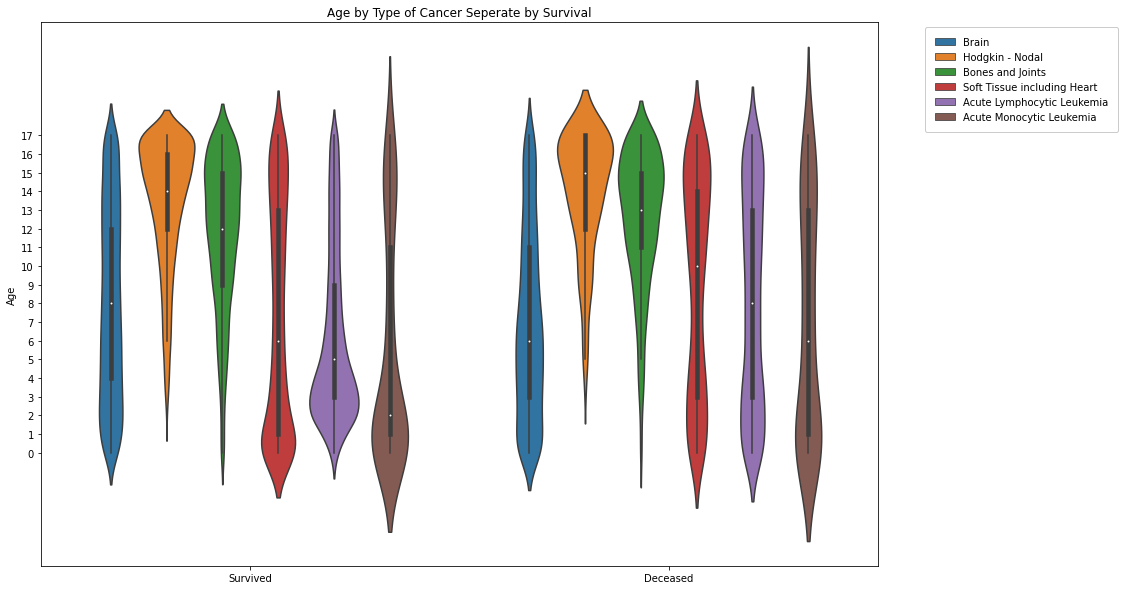

In [28]:
# Violin plot showing type of cancer, age, and survival
plt.figure(figsize = (15,10))
ax = sns.violinplot(x='Cause_of_Death', y = 'Age', data = df2, hue = 'Site', dodge = True)
plt.title("Age by Type of Cancer Seperate by Survival")
plt.legend(bbox_to_anchor = (1.05,1.0), loc = 'upper left', fancybox = True, framealpha = 1, borderpad = 1)
plt.yticks(range(0,18))
ax.set(xlabel = None)
plt.show()

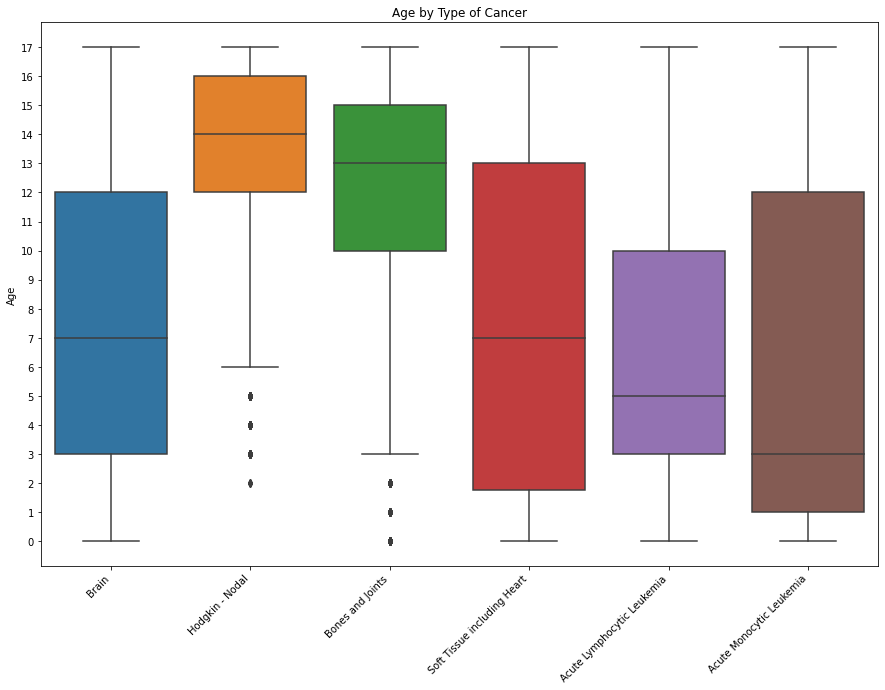

In [29]:
plt.figure(figsize = (15,10))
ax = sns.boxplot(x='Site', y = 'Age', data = df2)
plt.title("Age by Type of Cancer")
plt.xticks(rotation = 45, ha = 'right') # rotate x labels and move to right
plt.yticks(range(0,18))
ax.set(xlabel = None)
plt.show()

These graphs show how age may play a factor in survival and type of cancer. It is important to see if there is a relationship with cancer and age to create better treatment or screening.

## Examine gender variable

In [30]:
cod_gender_table = pd.crosstab(clean_cod['Sex'], columns = clean_cod['Cause_of_Death'], normalize = 'index')
cod_gender_table = cod_gender_table.rename_axis(None, axis = 1)
cod_gender_table = cod_gender_table.rename_axis(None)
cod_gender_table.style.format('{:.2%}')

,Deceased,Survived
Female,14.67%,85.33%
Male,16.22%,83.78%


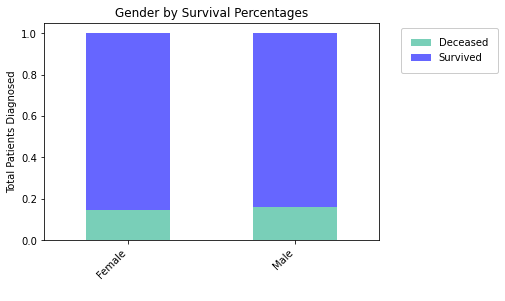

In [31]:
# Create bar graph showing survival percentages by race
cod_gender_table.plot(kind = 'bar', stacked = True, rot = 0, color = pal)
plt.ylabel('Total Patients Diagnosed')
plt.title('Gender by Survival Percentages')
plt.xlabel(' ')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(bbox_to_anchor = (1.05,1.0), loc = 'upper left', fancybox = True, framealpha = 1, 
           borderpad =1)
plt.show()

## Examine Race and Origin Variable

In [32]:
# Create table that shows survival percentage by race
clean_ro = pd.DataFrame(clean_cod.loc[clean_cod['Race_Origin_Recode'] != 'Non-Hispanic Unknown Race'])
cod_race_table = pd.crosstab(clean_ro['Race_Origin_Recode'], columns = clean_ro['Cause_of_Death'], normalize = 'index')
cod_race_table = cod_race_table.rename_axis(None, axis = 1)
cod_race_table = cod_race_table.rename_axis(None)
cod_race_table.style.format('{:.2%}')

,Deceased,Survived
Hispanic (All Races),16.48%,83.52%
Non-Hispanic American Indian/Alaska Native,17.44%,82.56%
Non-Hispanic Asian or Pacific Islander,16.89%,83.11%
Non-Hispanic Black,20.45%,79.55%
Non-Hispanic White,13.90%,86.10%


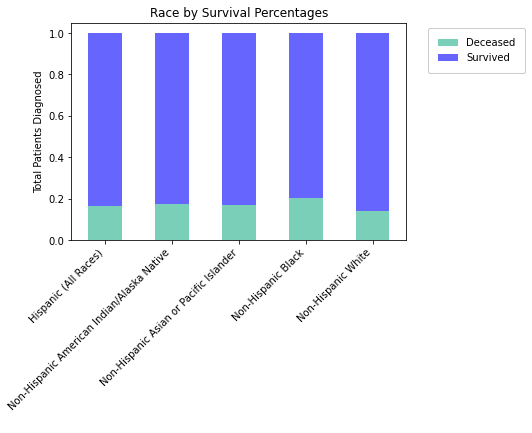

In [33]:
# Create bar graph showing survival percentages by race
cod_race_table.plot(kind = 'bar', stacked = True, rot = 0, color = pal)
plt.ylabel('Total Patients Diagnosed')
plt.title('Race by Survival Percentages')
plt.xlabel(' ')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(bbox_to_anchor = (1.05,1.0), loc = 'upper left', fancybox = True, framealpha = 1, 
           borderpad =1)
plt.show()

## Examine Median Household Income Variable

In [37]:
# Create table that shows survival percentage by median household income
clean_inc = pd.DataFrame(clean_cod.loc[clean_cod['Med_House_Inc'] != 'Unknown/missing/no match/Not 1990-2018'])
clean_inc['Med_House_Inc'] = clean_inc['Med_House_Inc'].astype('str')
cod_inc_table = pd.crosstab(clean_cod['Med_House_Inc'], columns = clean_cod['Cause_of_Death'], normalize = 'index')
cod_inc_table = cod_inc_table.rename_axis(None, axis = 1)
cod_inc_table = cod_inc_table.rename_axis(None)
cod_inc_table.style.format('{:.2%}')

,Deceased,Survived
"$35,000 - $39,999",16.74%,83.26%
"$40,000 - $44,999",17.40%,82.60%
"$45,000 - $49,999",15.05%,84.95%
"$50,000 - $54,999",15.71%,84.29%
"$55,000 - $59,999",15.30%,84.70%
"$60,000 - $64,999",17.20%,82.80%
"$65,000 - $69,999",14.64%,85.36%
"$70,000 - $74,999",15.63%,84.37%
"$75,000+",14.66%,85.34%
"< $35,000",16.95%,83.05%


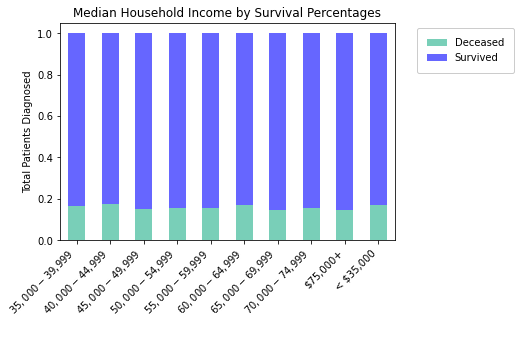

In [38]:
# Create bar graph showing survival percentages by median household income
cod_inc_table = pd.crosstab(clean_inc['Med_House_Inc'], columns = clean_inc['Cause_of_Death'], normalize = 'index')
cod_inc_table.plot(kind = 'bar', stacked = True, rot = 0, color = pal)
plt.ylabel('Total Patients Diagnosed')
plt.title('Median Household Income by Survival Percentages')
plt.xlabel(' ')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(bbox_to_anchor = (1.05,1.0), loc = 'upper left', fancybox = True, framealpha = 1, 
           borderpad =1)
plt.show()

## Examine Rural Urban variable

In [39]:
# Create table that shows survival percentage by rural urban code
clean_rural = pd.DataFrame(clean_cod.loc[clean_cod['Rural_Urban_Code'] != 'Unknown/missing/no match/Not 1990-2018'])
cod_rural_table = pd.crosstab(clean_rural['Rural_Urban_Code'], columns = clean_rural['Cause_of_Death'], normalize = 'index')
cod_rural_table = cod_rural_table.rename_axis(None, axis = 1)
cod_rural_table = cod_rural_table.rename_axis(None)
cod_rural_table.style.format('{:.2%}')

,Deceased,Survived
Counties in metropolitan areas ge 1 million pop,15.46%,84.54%
"Counties in metropolitan areas of 250,000 to 1 million pop",14.99%,85.01%
Counties in metropolitan areas of lt 250 thousand pop,16.64%,83.36%
Nonmetropolitan counties adjacent to a metropolitan area,15.77%,84.23%
Nonmetropolitan counties not adjacent to a metropolitan area,16.62%,83.38%
Unknown/missing/no match (Alaska or Hawaii - Entire State),17.07%,82.93%


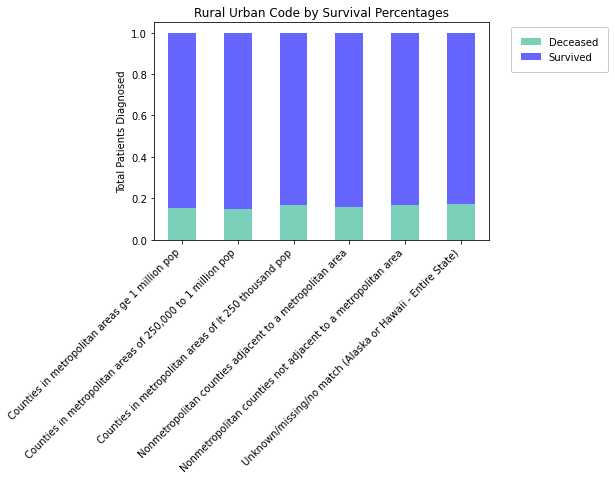

In [40]:
# Create bar graph showing survival percentages by rural urban code
cod_rural_table.plot(kind = 'bar', stacked = True, rot = 0, color = pal)
plt.ylabel('Total Patients Diagnosed')
plt.title('Rural Urban Code by Survival Percentages')
plt.xlabel(' ')
plt.xticks(rotation = 45, ha = 'right')
plt.legend(bbox_to_anchor = (1.05,1.0), loc = 'upper left', fancybox = True, framealpha = 1, 
           borderpad =1)
plt.show()

## Z-Test and the Central Limit Theorem for Hypothesis Testing

In [44]:
# Remove Unknown Race / Origin
print(clean_cod.shape)
clean_ro = pd.DataFrame(clean_cod.loc[clean_cod['Race_Origin_Recode'] != 'Non-Hispanic Unknown Race'])
print(clean_ro.shape)

(68904, 22)
(68163, 22)


In [45]:
# Replace text with numbers for cause of death
clean_cod_def = {"Cause_of_Death":
            {"Survived": 1, 
            "Deceased": 0}}
clean_ro2 = clean_ro.replace(clean_cod_def)

In [46]:
clean_ro2.Cause_of_Death.value_counts()

1    57506
0    10657
Name: Cause_of_Death, dtype: int64

In [47]:
h_sample = np.array([np.mean(clean_ro2[clean_ro2['Race_Origin_Recode'] == 'Hispanic (All Races)'].sample(35)
                            ['Cause_of_Death'].values) for i in range(100)])
AIAN_sample = np.array([np.mean(clean_ro2[clean_ro2['Race_Origin_Recode'] == 'Non-Hispanic American Indian/Alaska Native'].sample(35)
                            ['Cause_of_Death'].values) for i in range(100)])
NHAPI_sample = np.array([np.mean(clean_ro2[clean_ro2['Race_Origin_Recode'] == 'Non-Hispanic Asian or Pacific Islander'].sample(35)
                            ['Cause_of_Death'].values) for i in range(100)])
NHB_sample = np.array([np.mean(clean_ro2[clean_ro2['Race_Origin_Recode'] == 'Non-Hispanic Black'].sample(35)
                            ['Cause_of_Death'].values) for i in range(100)])
w_sample = np.array([np.mean(clean_ro2[clean_ro2['Race_Origin_Recode'] == 'Non-Hispanic White'].sample(35)
                            ['Cause_of_Death'].values) for i in range(100)])

In [48]:
print(h_sample.mean())
print(AIAN_sample.mean())
print(NHAPI_sample.mean())
print(NHB_sample.mean())
print(w_sample.mean())

0.8331428571428571
0.8157142857142857
0.84
0.7994285714285715
0.8642857142857143


/Users/teresacameron/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/teresacameron/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


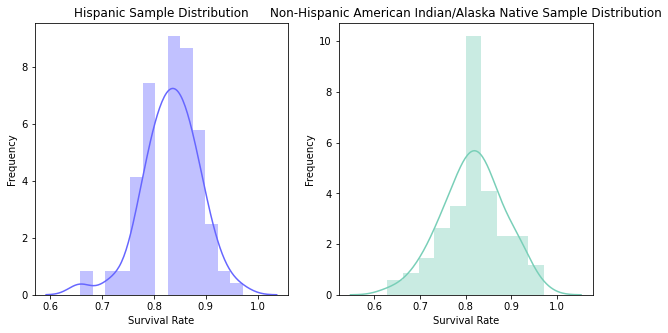

In [49]:
plt.subplots(1, 2, figsize = (10, 5))
plt.subplot(1,2, 1)
sns.distplot(h_sample, color = '#6666ff')
plt.title("Hispanic Sample Distribution")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
sns.distplot(AIAN_sample, color = '#79cfb8')
plt.title("Non-Hispanic American Indian/Alaska Native Sample Distribution")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.show()

/Users/teresacameron/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/teresacameron/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

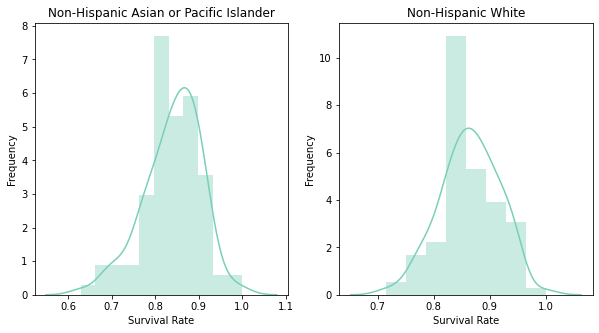

In [50]:
plt.subplots(1, 2, figsize = (10, 5))
plt.subplot(1,2, 1)
sns.distplot(NHAPI_sample, color = '#79cfb8')
plt.title("Non-Hispanic Asian or Pacific Islander")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")
plt.subplot(1, 2, 2)
figsize = (10, 5)
sns.distplot(w_sample, color = '#79cfb8')
plt.title("Non-Hispanic White")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")

/Users/teresacameron/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

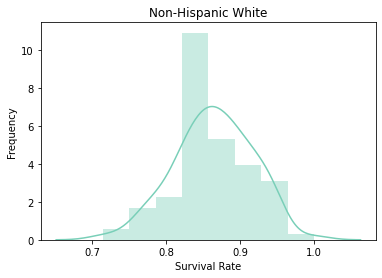

In [51]:
figsize = (10, 5)
sns.distplot(w_sample, color = '#79cfb8')
plt.title("Non-Hispanic White")
plt.xlabel("Survival Rate")
plt.ylabel("Frequency")

In [52]:
# Compare means of white and black patients
effect = np.mean(w_sample) - np.mean(NHB_sample)
sigma_w = np.std(w_sample)
sigma_nhb = np.std(NHB_sample)
sigma_difference = np.sqrt((sigma_w**2)/len(w_sample)  +  (sigma_nhb**2)/len(NHB_sample))
z_score = effect / sigma_difference
z_score

7.323685759169502

In [53]:
# Get p value
import scipy.stats as st
st.norm.sf(abs(z_score))*2

2.4125124915820617e-13

In [54]:
# Compare means of white and hispanic patients
effect = np.mean(w_sample) - np.mean(h_sample)
sigma_w = np.std(w_sample)
sigma_h = np.std(h_sample)
sigma_difference = np.sqrt((sigma_w**2)/len(w_sample)  +  (sigma_h**2)/len(h_sample))
z_score = effect / sigma_difference
z_score

4.113383273953987

In [55]:
st.norm.sf(abs(z_score))*2

3.899022330378639e-05

In [56]:
# Compare means of white and AIAN patients
effect = np.mean(w_sample) - np.mean(AIAN_sample)
sigma_w = np.std(w_sample)
sigma_AIAN = np.std(AIAN_sample)
sigma_difference = np.sqrt((sigma_w**2)/len(w_sample)  +  (sigma_AIAN**2)/len(AIAN_sample))
z_score = effect / sigma_difference
z_score

5.687241142021206

In [57]:
st.norm.sf(abs(z_score))*2

1.291080898032526e-08

In [58]:
# Compare means of white and NHAPI patients
effect = np.mean(w_sample) - np.mean(NHAPI_sample)
sigma_w = np.std(w_sample)
sigma_NHAPI = np.std(NHAPI_sample)
sigma_difference = np.sqrt((sigma_w**2)/len(w_sample)  +  (sigma_NHAPI**2)/len(NHAPI_sample))
z_score = effect / sigma_difference
z_score

2.88384236091191

In [59]:
st.norm.sf(abs(z_score))*2

0.003928553562918709